In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date

In [4]:
frames = []
usernames = ["JustinTrudeau","ElizabethMay","AndrewScheer","MaximeBernier","theJagmeetSingh"]
colours = ['r','g','b','purple','orange']
for username in usernames:
    file_path = "../../data/{}_data.csv".format(username)
    timeline_df = pd.read_csv(file_path)
    frames.append(timeline_df)
total_df = pd.concat(frames,sort=False)  
total_df.head(3)  

id                      created_at  \
0  1186063209381486593  Sun Oct 20 23:34:39 +0000 2019   
1  1186062450686337024  Sun Oct 20 23:31:38 +0000 2019   
2  1186055621684187136  Sun Oct 20 23:04:30 +0000 2019   

                                              source  favorite_count  \
0  <a href="https://studio.twitter.com" rel="nofo...            9220   
1  <a href="https://mobile.twitter.com" rel="nofo...            1553   
2  <a href="https://mobile.twitter.com" rel="nofo...            1301   

   retweet_count original_author   type  \
0           3189   JustinTrudeau  tweet   
1            295   JustinTrudeau  tweet   
2            445   JustinTrudeau  tweet   

                                          clean_text  \
0  andrew scheer gay marriage woman right choose ...   
1                         lower tax everyone except    
2  choice clear real plan make life affordable vo...   

                                       original_text  lda_cluster  
0  Andrew Scheer is against gay marriage, against...            3  
1  For lower taxes for everyone except the 1%. #C...            1  
2  The choice is clear. For a real plan to make l...            1

In [5]:
total_df["Date"] = pd.to_datetime(total_df['created_at']).dt.date
tweets_over_time = total_df[["Date","created_at"]]
tweets_over_time["Cumulative"] = total_df["created_at"]
tweets_over_time = tweets_over_time.drop("created_at",axis=1)
tweets_over_time = tweets_over_time.groupby(tweets_over_time["Date"]).count()
cumulative_tweets = tweets_over_time["Cumulative"].cumsum()
cumulative_tweets.head()

Date
2018-10-21      6
2018-10-22     24
2018-10-23     50
2018-10-24     82
2018-10-25    107
Name: Cumulative, dtype: int64

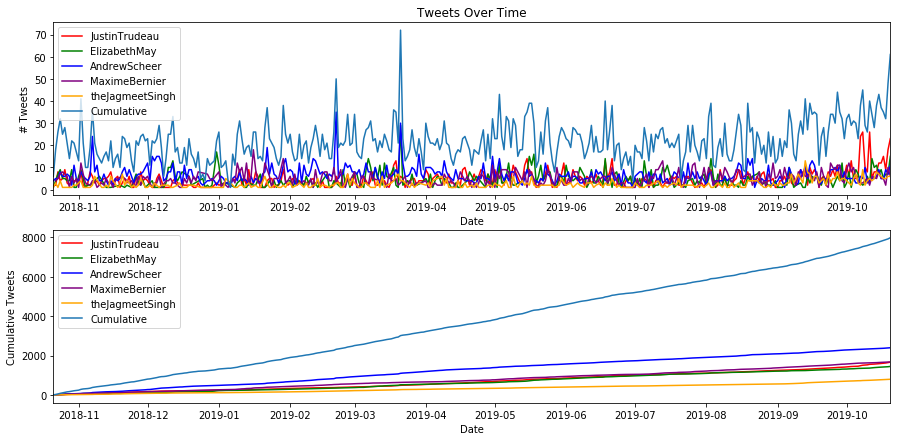

In [13]:
fig, _ = plt.subplots(figsize=(15,7))
ax = plt.subplot(2, 1, 1)
plt.title("Tweets Over Time")
plt.ylabel('# Tweets')
for username,u_df,colour in zip(usernames,frames,colours):
    u_df["Date"] = pd.to_datetime(u_df['created_at']).dt.date
    u_df = u_df.groupby(u_df["Date"])
    c_t = u_df["created_at"].count()
    c_t.plot(ax=ax,label=username,color=colour)
tweets_over_time.plot(ax=ax,label="Cumulative")
ax.legend()
ax = plt.subplot(2, 1, 2)
plt.ylabel('Cumulative Tweets')
for username,u_df,colour in zip(usernames,frames,colours):
    u_df["Date"] = pd.to_datetime(u_df['created_at']).dt.date
    u_df = u_df.groupby(u_df["Date"]).count()
    c_t = u_df["created_at"].cumsum()
    c_t.plot(ax=ax,label=username,color=colour)
cumulative_tweets.plot(ax=ax,label="Cumulative")
ax.legend()
plt.savefig("../visualizations/descriptive_charts/tweets_over_time.png")

In [2]:
frames = []
usernames = ["JustinTrudeau","ElizabethMay","AndrewScheer","MaximeBernier","theJagmeetSingh"]
for username in usernames:
    file_path = "../data/{}_retweets.csv".format(username)
    timeline_df = pd.read_csv(file_path)
    frames.append(timeline_df)
retweets_df = pd.concat(frames,sort=False) 
retweets_df["Date"] = pd.to_datetime(retweets_df['created_at']).dt.date
retweets_df.head(3)  

original_tweet_id           retweet_id     type  \
0  1186377502907912192  1190788396441931776  retweet   
1  1186377502907912192  1189553602110603265  retweet   
2  1186377502907912192  1188026893762781184  retweet   

                       created_at  \
0  Sun Nov 03 00:30:52 +0000 2019   
1  Wed Oct 30 14:44:14 +0000 2019   
2  Sat Oct 26 09:37:38 +0000 2019   

                                              source  favorite_count  \
0  <a href="https://mobile.twitter.com" rel="nofo...               0   
1  <a href="http://twitter.com/download/iphone" r...               0   
2  <a href="https://mobile.twitter.com" rel="nofo...               0   

   retweet_count original_author        Date  
0           1141       viewsini1  2019-11-03  
1           1141       el_mesary  2019-10-30  
2           1141    Pari95751293  2019-10-26

In [26]:
retweets_over_time = retweets_df[["Date","retweet_id"]]
retweets_over_time["retweets"] = retweets_df["retweet_id"]
retweets_over_time = retweets_over_time.drop("retweet_id",axis=1)
retweets_over_time = retweets_over_time.groupby(retweets_over_time["Date"]).count()
cumulative_retweets = retweets_over_time["retweets"].cumsum()
cumulative_retweets.head()

/Users/student/Desktop/School/CISC500/sourceCode/thesisEnv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Date
2018-10-21     27
2018-10-22    127
2018-10-23    309
2018-10-24    564
2018-10-25    838
Name: retweets, dtype: int64

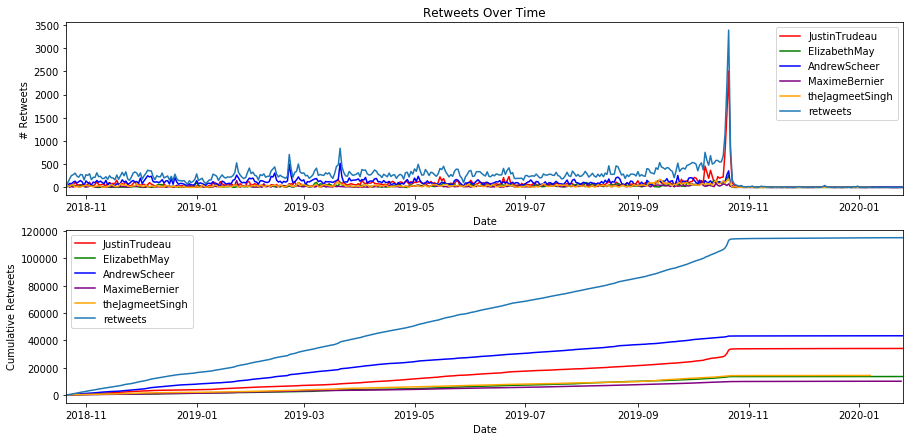

In [27]:
fig, _ = plt.subplots(figsize=(15,7))
ax = plt.subplot(2, 1, 1)
plt.title("Retweets Over Time")
plt.ylabel('# Retweets')
for username,u_df,colour in zip(usernames,frames,colours):
    u_df["Date"] = pd.to_datetime(u_df['created_at']).dt.date
    u_df = u_df.groupby(u_df["Date"])
    c_t = u_df["created_at"].count()
    c_t.plot(ax=ax,label=username,color=colour)
retweets_over_time.plot(ax=ax)
ax.legend()
ax = plt.subplot(2, 1, 2)
plt.ylabel('Cumulative Retweets')
for username,u_df,colour in zip(usernames,frames,colours):
    u_df["Date"] = pd.to_datetime(u_df['created_at']).dt.date
    u_df = u_df.groupby(u_df["Date"]).count()
    c_t = u_df["created_at"].cumsum()
    c_t.plot(ax=ax,label=username,color=colour)
cumulative_retweets.plot(ax=ax)
ax.legend()
plt.savefig("../visualizations/descriptive_charts/retweets_over_time.png")

In [6]:
total_df = total_df[total_df["lda_cluster"] != -1]
topics = total_df[["lda_cluster","id"]].groupby("lda_cluster").count()

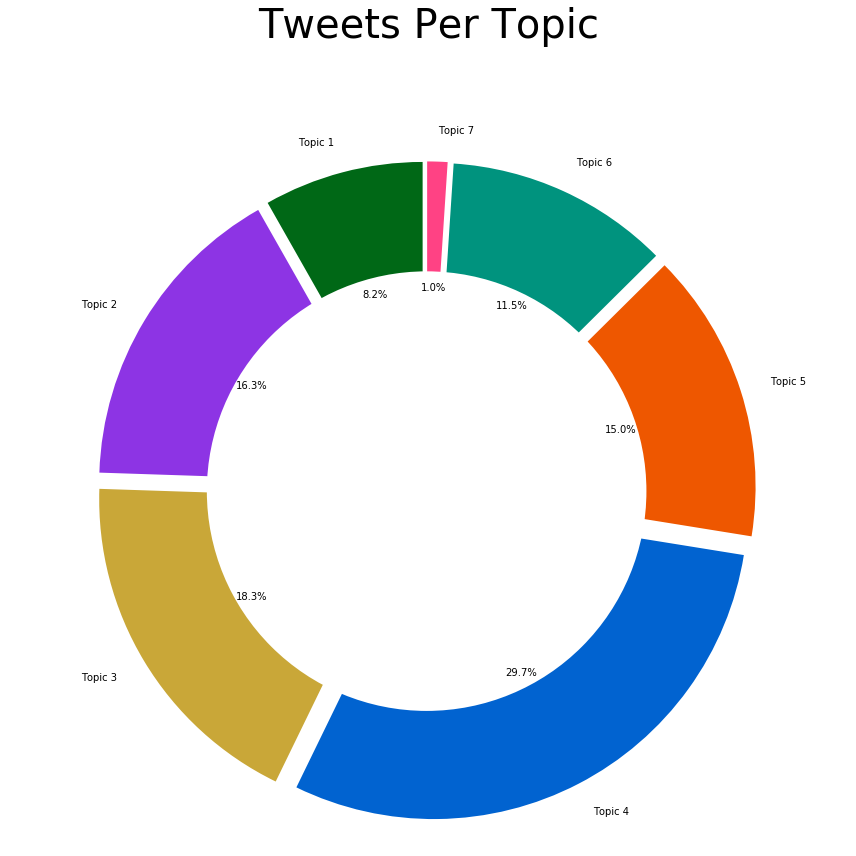

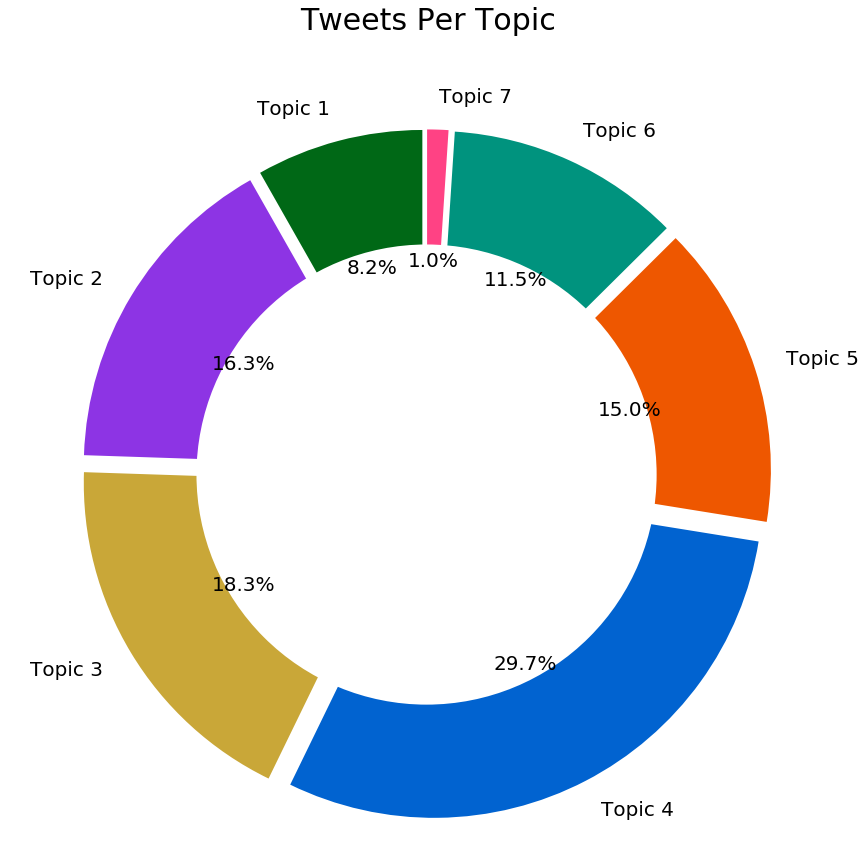

In [10]:
# Pie chart
labels = ["Topic {}".format(ind+1) for ind in topics.index]
topic_magnitude = list(topics.id)
colors = ["#006816", "#8d34e4", "#c9a738", "#0163d0","#ee5700", "#00937e", "#ff4284","#4b5400","#ea80ff","#9f0040"][:len(topic_magnitude)]
explode = [0.05 for i in range(len(labels))]
fig1, ax = plt.subplots(figsize=(12,12))
plt.title("Tweets Per Topic\n\n",fontsize=30)
ax.pie(topic_magnitude, colors = colors, labels=labels, autopct='%1.1f%%', explode=explode,startangle=90,textprops=dict(fontsize=20))#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  
plt.tight_layout()
plt.show()
plt.savefig("../visualizations/descriptive_charts/topic_distribution.png")

In [5]:
retweets_df[retweets_df["original_author"] == "BilalTa77"].head()

original_tweet_id           retweet_id     type  \
3  1186377502907912192  1187914925131386880  retweet   

                       created_at  \
3  Sat Oct 26 02:12:43 +0000 2019   

                                              source  favorite_count  \
3  <a href="http://twitter.com/download/android" ...               0   

   retweet_count original_author        Date  
3           1141       BilalTa77  2019-10-26

In [16]:
by_retweeter = retweets_df.groupby(["original_author"]).size().reset_index(name="count")
by_retweeter.head()

original_author  count
0     000l0lll000l      1
1  0014966f0dea434     16
2    001_balwinder      2
3           00PM00      1
4            00kvi      1

In [14]:
by_retweeter_date = retweets_df.groupby("original_author").min()["Date"].reset_index()
by_retweeter_date.head()

original_author        Date
0     000l0lll000l  2019-10-21
1  0014966f0dea434  2018-11-10
2    001_balwinder  2019-09-04
3           00PM00  2018-11-03
4            00kvi  2019-10-12

In [22]:
count_and_dates = pd.merge(by_retweeter,by_retweeter_date,on="original_author")
count_and_dates.columns = ["User","Num Tweets","Earliest Retweet"]
count_and_dates.head()

User  Num Tweets Earliest Retweet
0     000l0lll000l           1       2019-10-21
1  0014966f0dea434          16       2018-11-10
2    001_balwinder           2       2019-09-04
3           00PM00           1       2018-11-03
4            00kvi           1       2019-10-12

In [23]:
print(count_and_dates.columns,count_and_dates.dtypes)

Index(['User', 'Num Tweets', 'Earliest Retweet'], dtype='object') User                object
Num Tweets           int64
Earliest Retweet    object
dtype: object


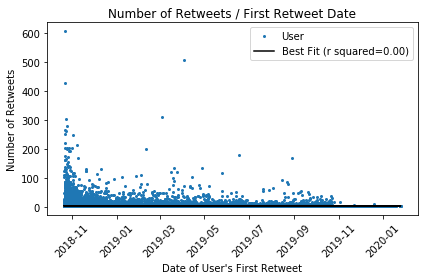

In [78]:
plt.title("Number of Retweets / First Retweet Date")
plt.ylabel("Number of Retweets")
plt.xlabel("Date of User's First Retweet")
#Line of best fit
x = np.arange(count_and_dates["Num Tweets"].size) # = array([0, 1, 2, ..., 3598, 3599, 3600])
y = count_and_dates["Num Tweets"]
slope,intercept = np.polyfit(x, count_and_dates['Num Tweets'], 1)
fit_fn = np.poly1d((slope,intercept))
r_squared = 1 - (sum((y - (slope * x + intercept))**2) / ((len(y) - 1) * np.var(y, ddof=1)))
# count_and_dates.plot.scatter(x='Earliest Retweet',y='Num Tweets',c='DarkBlue',ax=ax)
plt.plot_date(count_and_dates["Earliest Retweet"],y,ms=2,xdate=True,label="User")
plt.plot(count_and_dates['Earliest Retweet'], fit_fn(x), 'k-',label='Best Fit (r squared={:.2f})'.format(r_squared))
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../visualizations/descriptive_charts/num_retweets_by_first_retweet.png")

In [83]:
by_retweeter.sort_values(by=['count'], ascending=False).head()

original_author  count
19406  allan_crawshaw    608
11875      MillerOval    509
31136      sarmcbride    428
5738       ErikLuczak    310
22686       duoble007    305